In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('datasets/bank_data_processed.csv')
bank.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [3]:
X = bank.drop('CreditCard', axis= 1)
Y = bank['CreditCard']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size= 0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rand_clf = RandomForestClassifier(n_estimators = 400,
                                  max_leaf_nodes= 16,
                                  n_jobs= -1)
rand_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [7]:
y_pred = rand_clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.78125

In [9]:
imp_fe  =pd.Series(rand_clf.feature_importances_,
                   index = X.columns).sort_values(ascending= False)
imp_fe

CD Account            0.464459
Income                0.135502
Age                   0.126535
Mortgage              0.084006
Securities Account    0.057839
Online                0.053555
Family                0.044749
Education             0.033354
dtype: float64

Text(0.5, 1.0, 'important features')

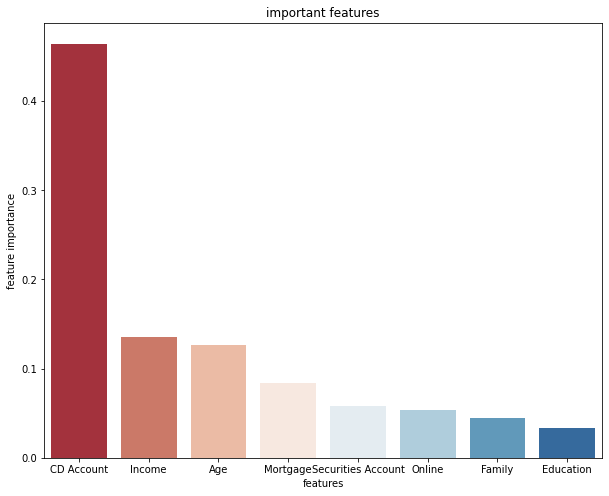

In [11]:
fig, ax = plt.subplots(figsize= (10,8))
sns.barplot(x = imp_fe.index,
            y = imp_fe,
            palette= 'RdBu')
plt.xlabel('features')
plt.ylabel('feature importance')

plt.title('important features')


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter= 'random',
                                                max_leaf_nodes= 12),
                                                n_estimators=400,
                                                max_samples= 1.0,
                                                bootstrap= True,
                                                n_jobs= -1)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=12,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [15]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8229166666666666

### extra trees

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
extra_trees = ExtraTreesClassifier(n_estimators= 600,
                                  max_leaf_nodes= 16,
                                  n_jobs= -1)
extra_trees.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=16, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [19]:
y_pred = extra_trees.predict(x_test)
accuracy_score(y_test, y_pred)

0.8125